# 1. Setup
## Import necessary packages and locate input and output folders

In [1]:
from IPython.display import display
from PIL import Image
import numpy as np
import os
import cv2

In [2]:
# Locate folder for pre-processing
input_folder = os.path.join(os.getcwd(), 'input_folder')
output_folder = os.path.join(os.getcwd(), 'output_folder')

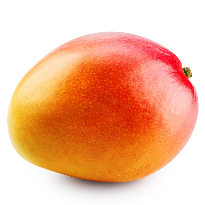

In [3]:
# load initial images
images = [f for f in os.listdir(input_folder) if f.endswith('.jpg')]

# Grab 1 image just to display what we are working with.
disp_img = cv2.imread(os.path.join(os.getcwd(), input_folder, images[0]))

# Convert image from BGR to RGB
disp_img = cv2.cvtColor(disp_img, cv2.COLOR_BGR2RGB)

# Shrink the image to display in notebook
disp_img = cv2.resize(disp_img, (0,0), fx=0.2, fy=0.2)

# Create an Image object to display
Image.fromarray(disp_img)

# 2. Image Processing - Visualized in Jupyter Notebook

Visualize distribution of the frequency of euclidian distance from the color red


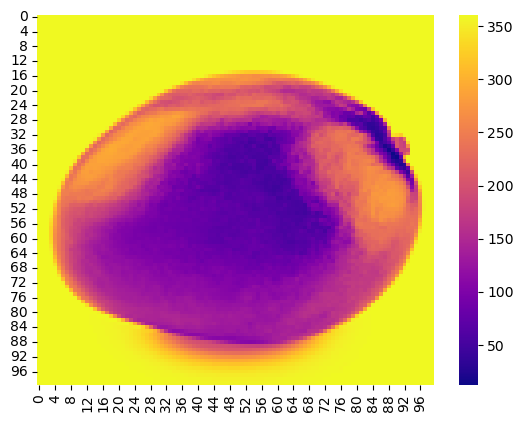

Current distribution of non-white pixels:


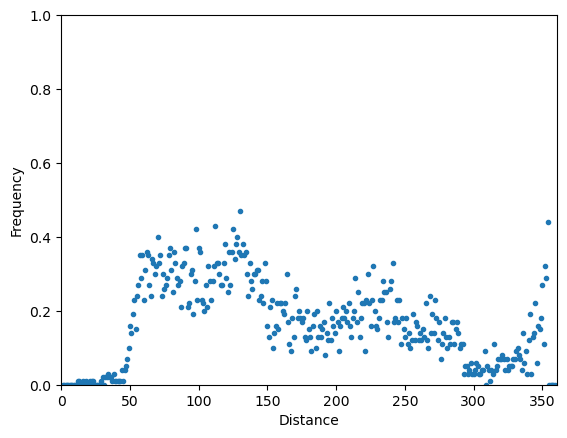

  5137 total unique pixels will be processed

---- 1 / 5 steps ----
   430 pixels will be processed in step 1


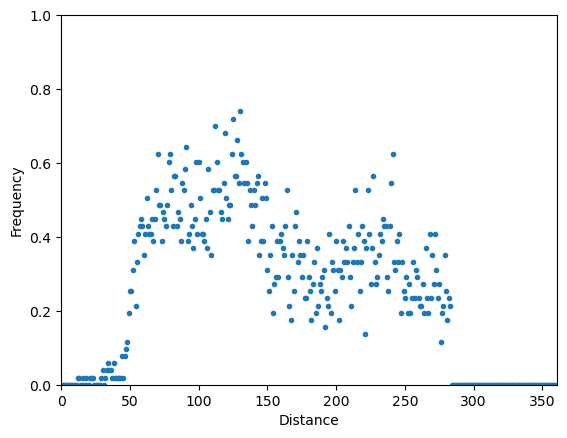

Visualization of mask mapping on input image


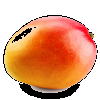


---- 2 / 5 steps ----
  1155 pixels will be processed in step 2


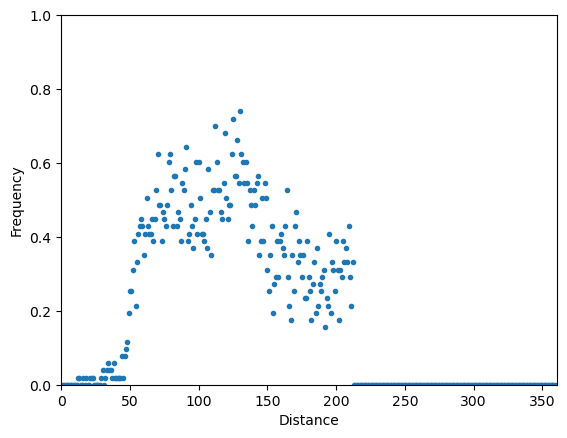

Visualization of mask mapping on input image


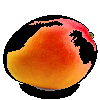


---- 3 / 5 steps ----
  1197 pixels will be processed in step 3


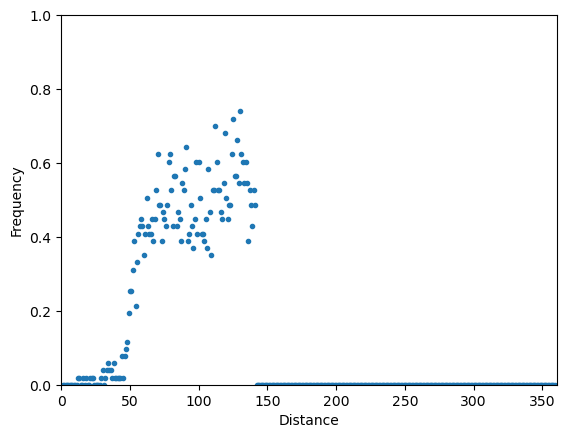

Visualization of mask mapping on input image


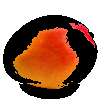


---- 4 / 5 steps ----
  1863 pixels will be processed in step 4


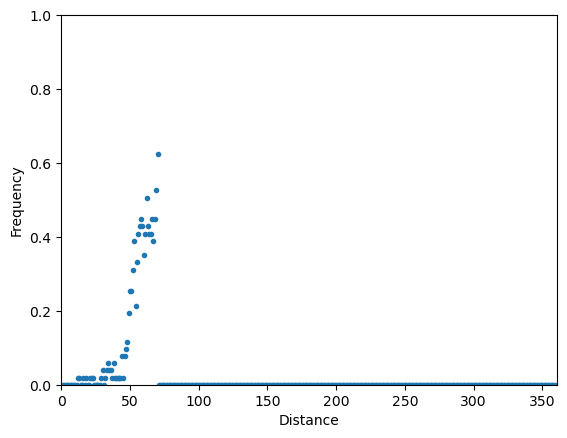

Visualization of mask mapping on input image


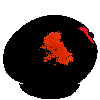


---- 5 / 5 steps ----
  5136 pixels will be processed in step 5


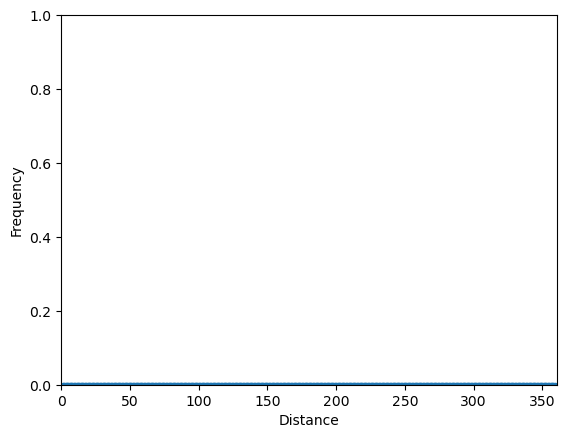

Visualization of mask mapping on input image


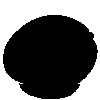

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

red = np.array([255, 0, 0])

img = Image.open(os.path.join(input_folder, images[0])).resize((100,100))
img_arr = np.array(img)

pixels = img_arr.reshape((100,100,3))

mask = np.zeros((100,100))

for i, pixel in enumerate(pixels):
    for j, rgb in enumerate(pixel):
        distance = np.linalg.norm(red - rgb)
        mask[i, j] = distance

# Visualize distribution of the frequency of euclidian distance from the color red
# This is to show how often colors show up on the image. From below, you can see that the distance of
#   ~360 is very common, which is the white background of the images. To preserve the white background,
#   we will exclude distances that exceed a threshold
print('Visualize distribution of the frequency of euclidian distance from the color red')
sns.heatmap(mask, cmap='plasma')

plt.show()

# Replace white pixels in the mask with 0 to normalize them. We will not process those pixels in the next part
mask[mask > 355] = 0

# Create initial settings for showing scatter plot
bins = range(0,361)

counts, buckets = np.histogram(mask, bins)
freqs = counts / np.sum(counts)*100

plt.scatter(buckets[:-1], freqs, marker='.')
plt.xlim(0, 361)
plt.ylim(0, 1)

plt.xlabel('Distance')
plt.ylabel('Frequency')

# Show current distribution of non-white pixels in the image
print('Current distribution of non-white pixels:')
plt.show()

# Determine how many pixels we have to convert in n_steps number of steps
n_steps = 5

# Find the number of unique pixels and their distance values to begin parsing through 
unique_mask, count_pixels = np.unique(mask, return_counts=True)
max_unique_mask = max(unique_mask)
count_pixels = len(unique_mask > 1e-15)

print('{:>6} total unique pixels will be processed'.format(count_pixels))

replaced_pixels = count_pixels // n_steps

# For n number of steps, we will apply black dots to the pixels farthest from the color red on the mask
for n in range(1, n_steps+1):
    print('')
    print('---- {:} / {:} steps ----'.format(n, n_steps))

    # Get the indices of the largest values in non_white_mask
    largest_indices = [x for x in unique_mask if x > (1-(n/n_steps)) * max_unique_mask]
    print('{:>6} pixels will be processed in step {:}'.format(len(largest_indices), n))

    # Replace the largest values with a tiny non-zero value. This is done to avoid classifying them as a white pixel
    for i, value in enumerate(unique_mask):
        if value in largest_indices:
            unique_mask[i] = 1e-15

    # Display a scatter plot for each step of the process
    counts, buckets = np.histogram(unique_mask, bins)
    freqs = (counts) / np.sum(counts)*100 

    plt.scatter(buckets[:-1], freqs, marker='.')
    plt.xlim(0, 361)
    plt.ylim(0, 1)

    plt.xlabel('Distance')
    plt.ylabel('Frequency')

    plt.show()

    # Convert the pixels of the largest distance from red to black in the initial mask with a distance value
    for i,row in enumerate(mask):
        for j,val in enumerate(row):
            if val in largest_indices:
                mask[i][j] = 1e-15

    # Convert the pixels of the largest distance from red to black in the initial mask with an RGB value
    for i,row in enumerate(mask):
        for j,val in enumerate(row):
            if val == 0:
                pixels[i][j] = [255,255,255]
            elif val == 1e-15:
                pixels[i][j] = [0,0,0]
            else:
                continue

    print('Visualization of mask mapping on input image')
    display(Image.fromarray(pixels))

# 3. Image Processing - Saves to Output Folder
### Process additional images to gather more images for model. This is only to illustrate how one could process additional images in a file using the above code to create more images for their model

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

red = np.array([255, 0, 0])

for image in images:
    # Fail-safe just in case images are not able to be processed
    try:
        print('--------- '+image)
        print('')
        img = Image.open(os.path.join(input_folder, image)).resize((100,100))
        img_arr = np.array(img)

        pixels = img_arr.reshape((100,100,3))

        mask = np.zeros((100,100))

        for i, pixel in enumerate(pixels):
            for j, rgb in enumerate(pixel):
                distance = np.linalg.norm(red - rgb)
                mask[i, j] = distance

        # Replace white pixels in the mask with 0 to normalize them. We will not process those pixels in the next part
        mask[mask > 355] = 0

        # Determine how many pixels we have to convert in n_steps number of steps
        n_steps = 50

        unique_mask, count_pixels = np.unique(mask, return_counts=True)
        max_unique_mask = max(unique_mask)
        count_pixels = len(unique_mask > 1e-15)

        print('{:>6} total unique pixels will be processed'.format(count_pixels))

        replaced_pixels = count_pixels // n_steps

        # For n number of steps, we will apply black dots to the pixels farthest from the color red on the mask
        for n in range(1, n_steps+1):

            if n % 10 == 0 and not n == 0:
                print('')
                print('---- {:} / {:} steps ----'.format(n, n_steps))

            # Get the indices of the largest values in non_white_mask
            largest_indices = [x for x in unique_mask if x > (1-(n/n_steps)) * max_unique_mask]
            print('{:>6} pixels will be processed in step {:}'.format(len(largest_indices), n))

            for i, value in enumerate(unique_mask):
                if value in largest_indices:
                    unique_mask[i] = 1e-15

            for i,row in enumerate(mask):
                for j,val in enumerate(row):
                    if val in largest_indices:
                        mask[i][j] = 1e-15

            for i,row in enumerate(mask):
                for j,val in enumerate(row):
                    if val == 0:
                        pixels[i][j] = [255,255,255]
                    elif val == 1e-15:
                        pixels[i][j] = [0,0,0]
                    else:
                        continue

            # Conver image to RGB for exporting
            img = Image.fromarray(pixels)

            # Create the output folder if it doesn't exist
            if not os.path.exists(output_folder):
                os.makedirs(output_folder)

            # Save the image to the output folder
            filename, extension = os.path.splitext(image)
            output_path = os.path.join(output_folder, filename+'-'+str(n)+extension)
            img.save(output_path)
        print('\n\n')
    
    # if the file is unable to be read resized to the correct shape, move on to the next
    except ValueError:
        print('Image {:} was not processed due to a ValueError.'.format(image))
        print('\n\n')
        continue

--------- ripe_mango_1.jpg

  5137 total unique pixels will be processed
    52 pixels will be processed in step 1
    46 pixels will be processed in step 2
    40 pixels will be processed in step 3
    44 pixels will be processed in step 4
    42 pixels will be processed in step 5
    29 pixels will be processed in step 6
    28 pixels will be processed in step 7
    28 pixels will be processed in step 8
    35 pixels will be processed in step 9

---- 10 / 50 steps ----
    86 pixels will be processed in step 10
    84 pixels will be processed in step 11
   103 pixels will be processed in step 12
    97 pixels will be processed in step 13
    98 pixels will be processed in step 14
    88 pixels will be processed in step 15
   128 pixels will be processed in step 16
   154 pixels will be processed in step 17
   134 pixels will be processed in step 18
   130 pixels will be processed in step 19

---- 20 / 50 steps ----
   139 pixels will be processed in step 20
   119 pixels will be proc

    28 pixels will be processed in step 26
    27 pixels will be processed in step 27
    28 pixels will be processed in step 28
    31 pixels will be processed in step 29

---- 30 / 50 steps ----
    39 pixels will be processed in step 30
    52 pixels will be processed in step 31
    65 pixels will be processed in step 32
    85 pixels will be processed in step 33
   118 pixels will be processed in step 34
   182 pixels will be processed in step 35
   296 pixels will be processed in step 36
   250 pixels will be processed in step 37
   148 pixels will be processed in step 38
    62 pixels will be processed in step 39

---- 40 / 50 steps ----
     8 pixels will be processed in step 40
     2 pixels will be processed in step 41
     1 pixels will be processed in step 42
     0 pixels will be processed in step 43
     0 pixels will be processed in step 44
     0 pixels will be processed in step 45
     0 pixels will be processed in step 46
     0 pixels will be processed in step 47
    

    31 pixels will be processed in step 8
    29 pixels will be processed in step 9

---- 10 / 50 steps ----
    36 pixels will be processed in step 10
    67 pixels will be processed in step 11
    51 pixels will be processed in step 12
    53 pixels will be processed in step 13
    54 pixels will be processed in step 14
    55 pixels will be processed in step 15
    44 pixels will be processed in step 16
    69 pixels will be processed in step 17
    70 pixels will be processed in step 18
    86 pixels will be processed in step 19

---- 20 / 50 steps ----
   112 pixels will be processed in step 20
   134 pixels will be processed in step 21
   107 pixels will be processed in step 22
   136 pixels will be processed in step 23
   184 pixels will be processed in step 24
   186 pixels will be processed in step 25
   179 pixels will be processed in step 26
   206 pixels will be processed in step 27
   189 pixels will be processed in step 28
   190 pixels will be processed in step 29

---- 

   366 pixels will be processed in step 34
   433 pixels will be processed in step 35
   360 pixels will be processed in step 36
   244 pixels will be processed in step 37
   256 pixels will be processed in step 38
   232 pixels will be processed in step 39

---- 40 / 50 steps ----
   189 pixels will be processed in step 40
    49 pixels will be processed in step 41
     0 pixels will be processed in step 42
     0 pixels will be processed in step 43
     0 pixels will be processed in step 44
     0 pixels will be processed in step 45
     0 pixels will be processed in step 46
     0 pixels will be processed in step 47
     0 pixels will be processed in step 48
     0 pixels will be processed in step 49

---- 50 / 50 steps ----
  6688 pixels will be processed in step 50



